In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import yahist
import itertools

from utils.analysis import Optimization

TAG = "STskim_nopresel"

In [2]:
babies = glob.glob(f"../analysis/studies/onelep/output_{TAG}/Run2/*.root")
babies = [baby for baby in babies if "data" not in baby]
babies

['../analysis/studies/onelep/output_STskim_nopresel/Run2/TTX.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/VH.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/WJets.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/SingleTop.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/TTbar1L.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/Bosons.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/TTbar2L.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/VBSWH_mkW.root']

In [3]:
vbswh = Optimization(
    sig_root_files=babies[-1:],
    bkg_root_files=babies[:-1],
    ttree_name="tree",
    weight_columns=["xsec_sf", "lep_sf"],
#     weight_columns=["xsec_sf"],
    plots_dir=f"/home/users/jguiang/public_html/onelep_plots/{TAG}/opt"
)
vbswh.df["presel_noVBS_noBVeto"] = vbswh.df.eval(
    "hbbjet_score > 0.3"
)
vbswh.df["presel_noVBS"] = vbswh.df.eval(
    "passes_bveto and hbbjet_score > 0.3"
)
vbswh.df["presel_noDetaJJ"] = vbswh.df.eval(
    "passes_bveto and M_jj > 500 and hbbjet_score > 0.3"
)
vbswh.df["presel"] = vbswh.df.eval(
    "passes_bveto and M_jj > 500 and abs(deta_jj) > 3 and hbbjet_score > 0.3"
)
vbswh.df["SR"] = vbswh.df.eval(
    "presel and ST > 1200 and M_jj > 1500 and abs(deta_jj) > 4 and hbbjet_score > 0.9 and hbbjet_msoftdrop < 150"
)
# vbswh.make_selection("passes_bveto == True")
# vbswh.make_selection("passes_bveto != True")

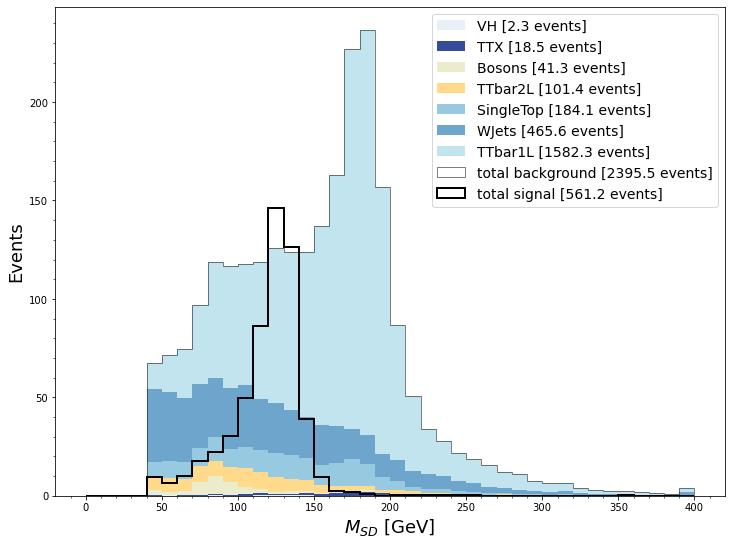

In [4]:
axes = vbswh.plot_sig_vs_bkg(
    "hbbjet_msoftdrop", np.linspace(0, 400, 41), 
    selection="presel",
    x_label="$M_{SD}$ [GeV]",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

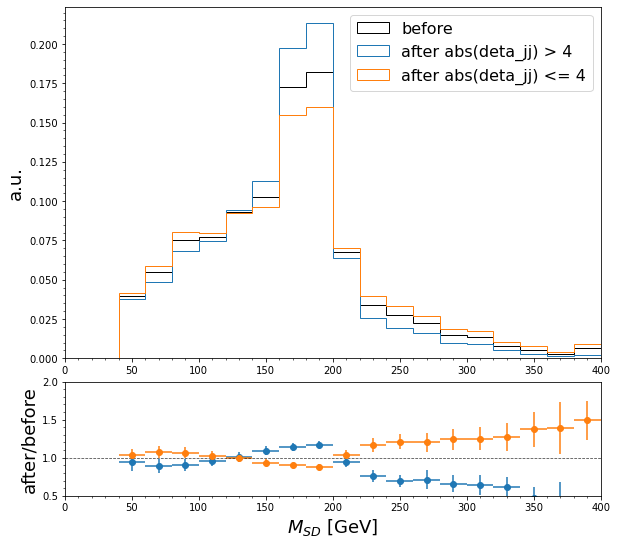

In [5]:
vbswh.plot_correlation(
    "hbbjet_msoftdrop", 
    np.linspace(0, 400, 21), 
    selections=[
        "abs(deta_jj) > 4",
        "abs(deta_jj) <= 4"
    ],
    base_selection="presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9",
    x_label="$M_{SD}$ [GeV]",
);

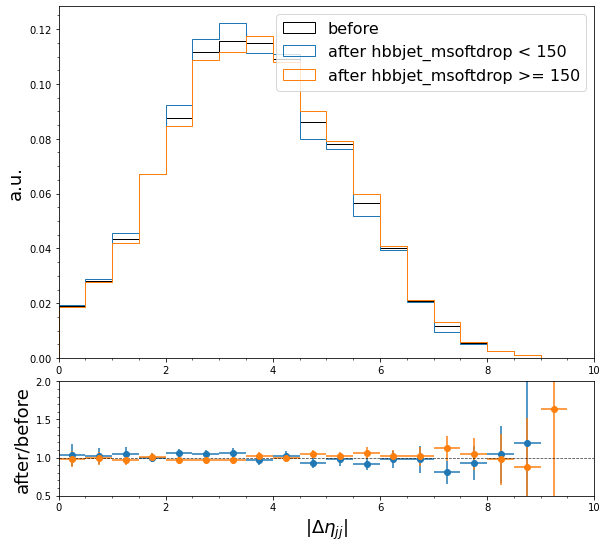

In [6]:
vbswh.plot_correlation(
    "deta_jj", 
    np.linspace(0, 10, 21),  
    selections=[
        "hbbjet_msoftdrop < 150",
        "hbbjet_msoftdrop >= 150"
    ], 
    base_selection="presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9",
    transf=abs,
    x_label=r"$|\Delta\eta_{jj}|$"
);

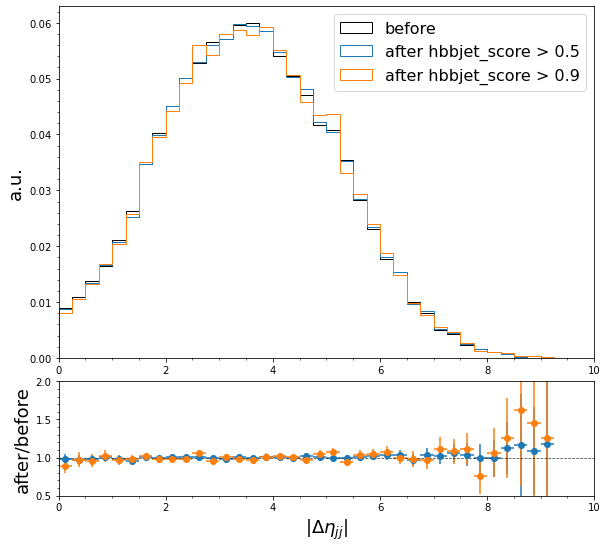

In [7]:
vbswh.plot_correlation(
    "deta_jj", 
    np.linspace(0, 10, 41),  
    selections=[
        "hbbjet_score > 0.5",
        "hbbjet_score > 0.9"
    ], 
    base_selection="presel_noDetaJJ and hbbjet_msoftdrop >= 150",
    transf=abs,
    x_label=r"$|\Delta\eta_{jj}|$"
);

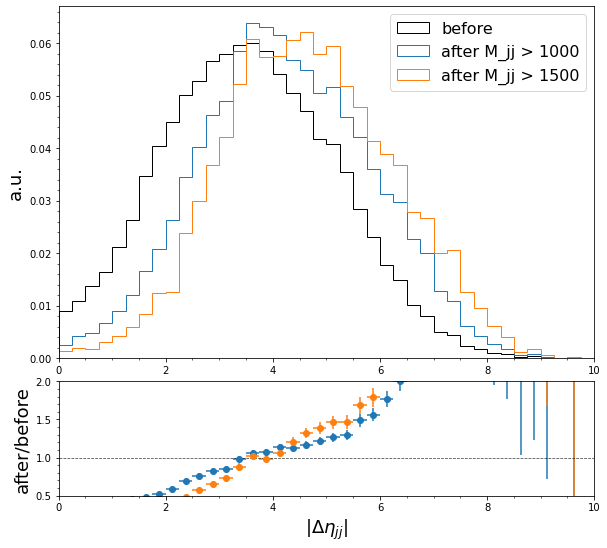

In [8]:
vbswh.plot_correlation(
    "deta_jj", 
    np.linspace(0, 10, 41),  
    selections=[
        "M_jj > 1000",
        "M_jj > 1500"
    ], 
    base_selection="presel_noDetaJJ and hbbjet_msoftdrop >= 150",
    transf=abs,
    x_label=r"$|\Delta\eta_{jj}|$"
);

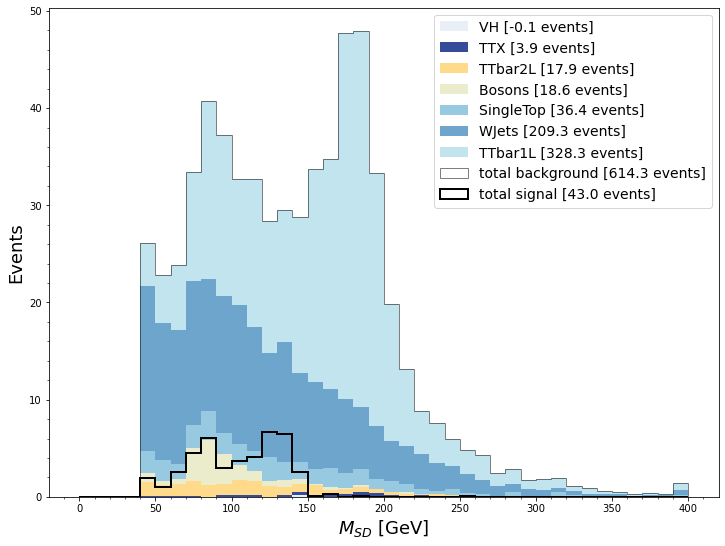

In [9]:
axes = vbswh.plot_sig_vs_bkg(
    "hbbjet_msoftdrop", np.linspace(0, 400, 41), 
    selection="presel and hbbjet_score < 0.6",
    x_label="$M_{SD}$ [GeV]",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

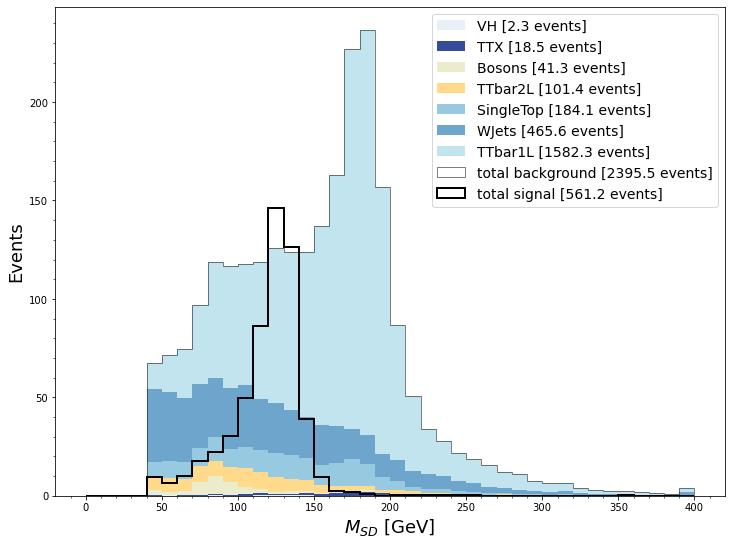

In [10]:
axes = vbswh.plot_sig_vs_bkg(
    "hbbjet_msoftdrop", np.linspace(0, 400, 41), 
    selection="presel",
    x_label="$M_{SD}$ [GeV]",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

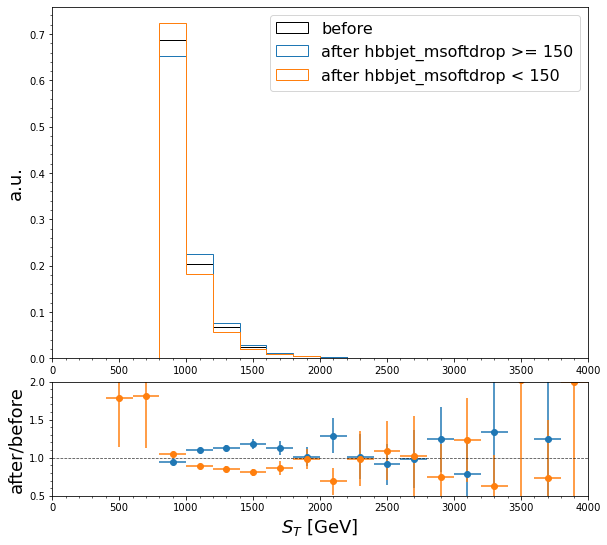

In [11]:
vbswh.plot_correlation(
    "ST", 
    np.linspace(0, 4000, 21),  
    selections=[
        "hbbjet_msoftdrop >= 150",
        "hbbjet_msoftdrop < 150"
    ], 
    base_selection="presel",
    x_label=r"$S_T$ [GeV]"
);

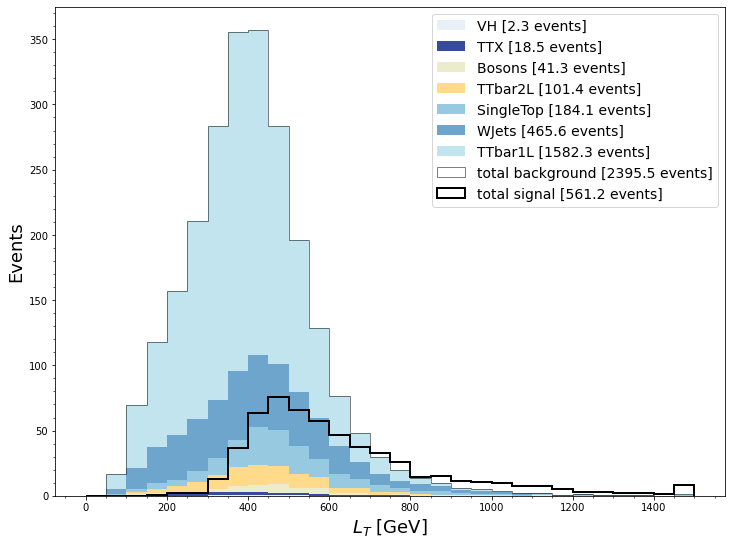

In [12]:
axes = vbswh.plot_sig_vs_bkg(
    "LT", np.linspace(0, 1500, 31), 
    selection="presel",
    x_label="$L_T$ [GeV]",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

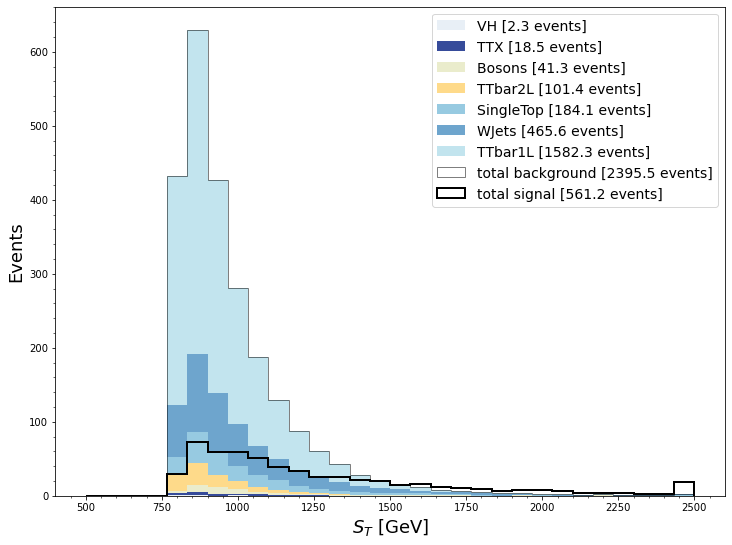

In [13]:
axes = vbswh.plot_sig_vs_bkg(
    "ST", np.linspace(500, 2500, 31), 
    selection="presel",
    x_label="$S_T$ [GeV]",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

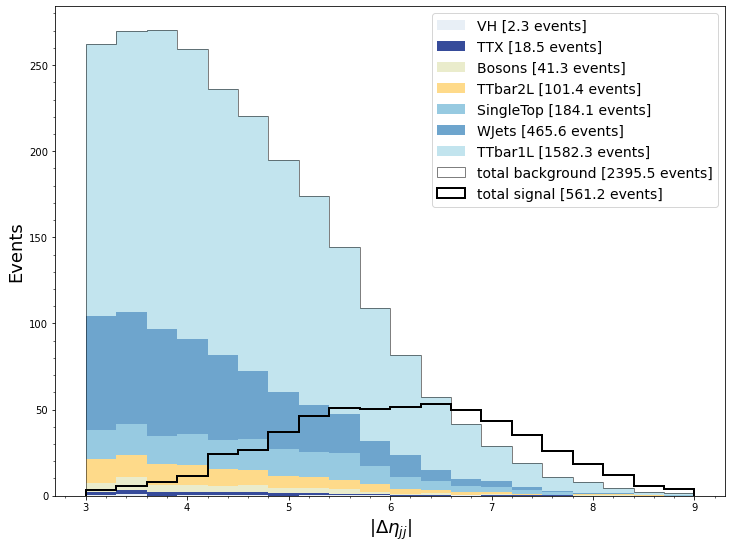

In [14]:
axes = vbswh.plot_sig_vs_bkg(
    "deta_jj", np.linspace(3, 9, 21), 
#     selection="M_jj > 1500 and abs(deta_jj) > 4 and hbbjet_score < 0.9", 
    selection="presel",
    x_label="$|\Delta\eta_{jj}|$",
    transf=abs,
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

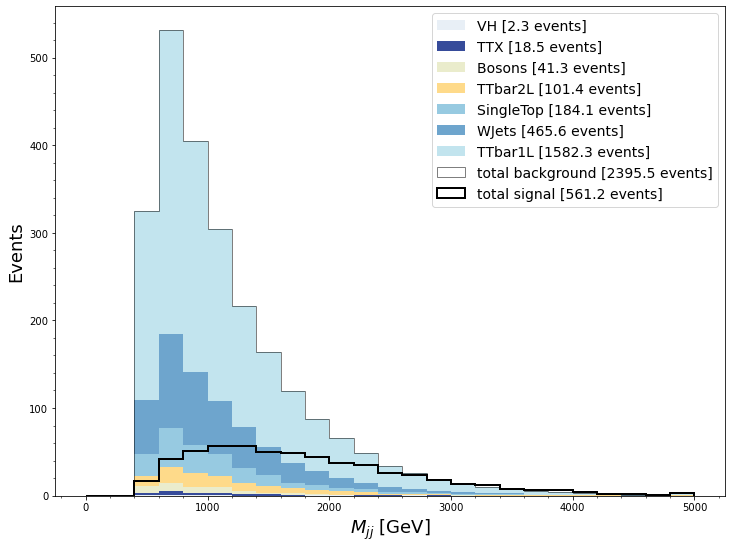

In [15]:
axes = vbswh.plot_sig_vs_bkg(
    "M_jj", np.linspace(0, 5000, 26), 
    selection="presel",
    x_label="$M_{jj}$ [GeV]",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

In [16]:
vbswh.get_event_counts(selection="presel and hbbjet_score < 0.6")

(43.024573693520985, 614.337912380793)

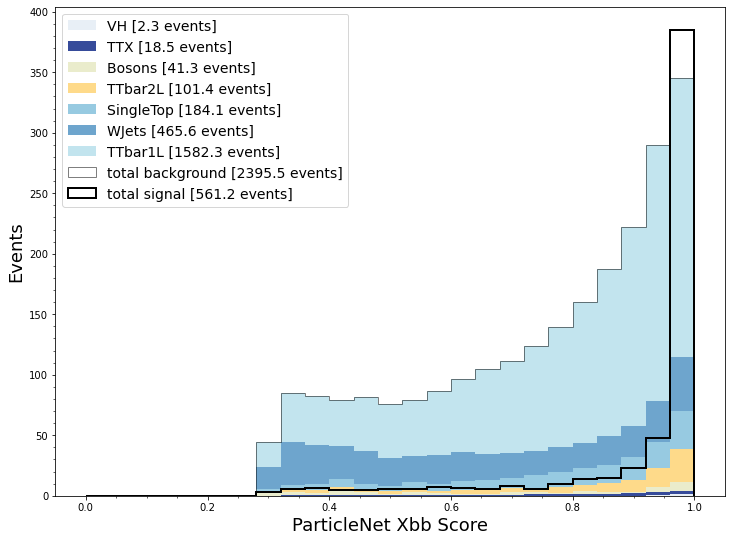

In [17]:
axes = vbswh.plot_sig_vs_bkg(
    "hbbjet_score", np.linspace(0, 1, 26), 
    selection="presel",
    x_label="ParticleNet Xbb Score",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);
axes.legend(loc=2, fontsize=14)

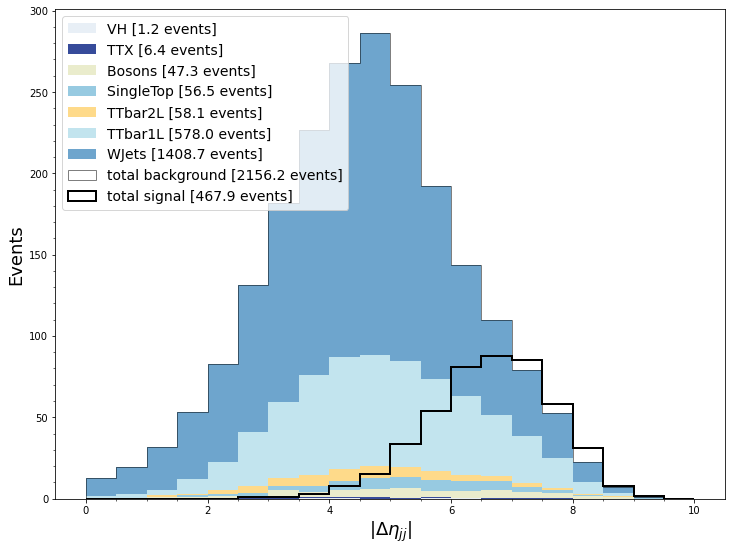

In [18]:
axes = vbswh.plot_sig_vs_bkg(
    "deta_jj", np.linspace(0, 10, 21), 
    selection="passes_bveto and M_jj > 1500", 
    x_label="$|\Delta\eta_{jj}|$",
    transf=abs,
    stacked=True
);
axes.legend(loc=2, fontsize=14);

In [19]:
vbswh.fom_scan(
    "deta_jj", [3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7], operator=">", 
    base_selection="M_jj > 1500", abs=True
)

sel,sig,bkg,fom
M_jj > 1500,490.2353390693034,4342.16819295683,7.439629257579291
M_jj > 1500 and abs(deta_jj) > 3.5,488.40937853892217,3362.6750845079,8.422510125391879
M_jj > 1500 and abs(deta_jj) > 4,484.25744638724416,2927.208332910596,8.950545222216201
M_jj > 1500 and abs(deta_jj) > 4.5,476.0991954682996,2418.5959974805933,9.680901083862384
M_jj > 1500 and abs(deta_jj) > 5,458.6386573631843,1866.7293330136372,10.6152440059398
M_jj > 1500 and abs(deta_jj) > 5.5,422.9728289760358,1354.8505054608445,11.491236981698139
M_jj > 1500 and abs(deta_jj) > 6,366.2948905128162,942.6081110854022,11.930682116424402
M_jj > 1500 and abs(deta_jj) > 6.5,281.7064781183783,621.2105328738788,11.30257581218965
M_jj > 1500 and abs(deta_jj) > 7,189.5121226445355,367.94425807860625,9.879750586637684


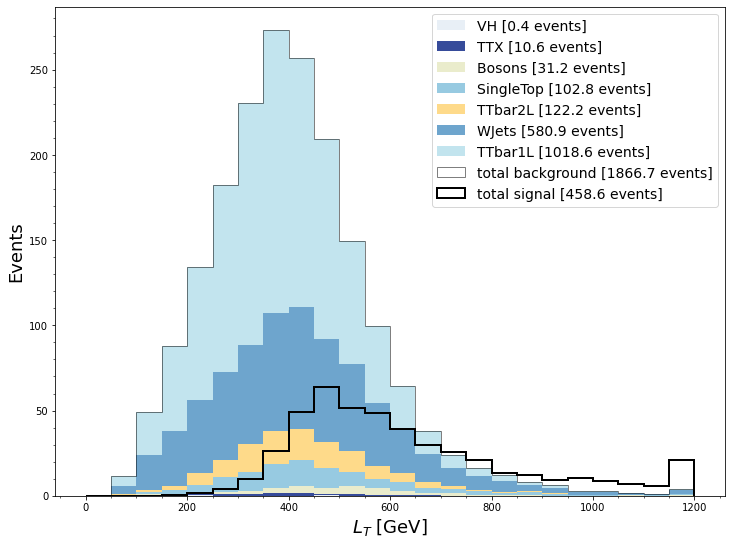

In [20]:
vbswh.plot_sig_vs_bkg(
    "LT", np.linspace(0, 1200, 25), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", 
    x_label="$L_T$ [GeV]",
    stacked=True
);

In [21]:
vbswh.fom_scan(
    "LT", [500, 600, 700, 800, 900, 1000, 1100, 1200], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
);

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5,458.6386573631843,1866.7293330136372,10.6152440059398
M_jj > 1500 and abs(deta_jj) > 5 and LT > 500,302.490059915952,430.8295262145947,14.57331587435493
M_jj > 1500 and abs(deta_jj) > 5 and LT > 600,202.424816084079,181.4005763729116,15.029496168668762
M_jj > 1500 and abs(deta_jj) > 5 and LT > 700,133.7327667922779,78.98130566264422,15.047892338294574
M_jj > 1500 and abs(deta_jj) > 5 and LT > 800,87.36680276646136,39.09344393877362,13.973155017260524
M_jj > 1500 and abs(deta_jj) > 5 and LT > 900,62.053033084092974,18.963376791624373,14.249682144978012
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1000,42.37285126642591,9.54136110229396,13.717738585711288
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1100,26.492145375104812,5.160152536955346,11.662344326523304
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1200,17.527842115641935,3.1822671701845997,9.82562383129169


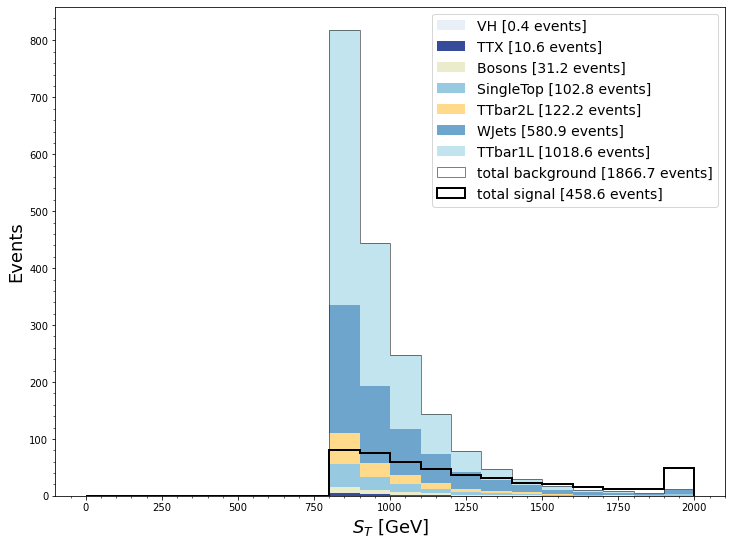

In [22]:
axes = vbswh.plot_sig_vs_bkg(
    "ST", np.linspace(0, 2000, 21), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", x_label="$S_T$ [GeV]",
    stacked=True
);
axes.set_ylim(ymin=0);

In [23]:
vbswh.fom_scan(
    "ST", [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1650, 1700, 1800], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5,458.6386573631843,1866.7293330136372,10.6152440059398
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1000,304.1432488373188,601.7778780066626,12.398240926671443
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1100,243.89878444028346,354.05420002709036,12.96208188045642
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1200,197.41341963109159,209.89214566954726,13.626319818108527
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300,161.58912736958405,131.24347912724,14.105005776591591
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1400,130.4048318683001,83.29843797966286,14.288125452770698
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1500,108.22659126605885,53.071554143742105,14.856040584905172
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1600,88.10048013634017,36.42597666949575,14.597304675233119
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1650,80.47730734550822,30.53640670991802,14.563456785304247
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1700,71.92559939788265,25.513895704

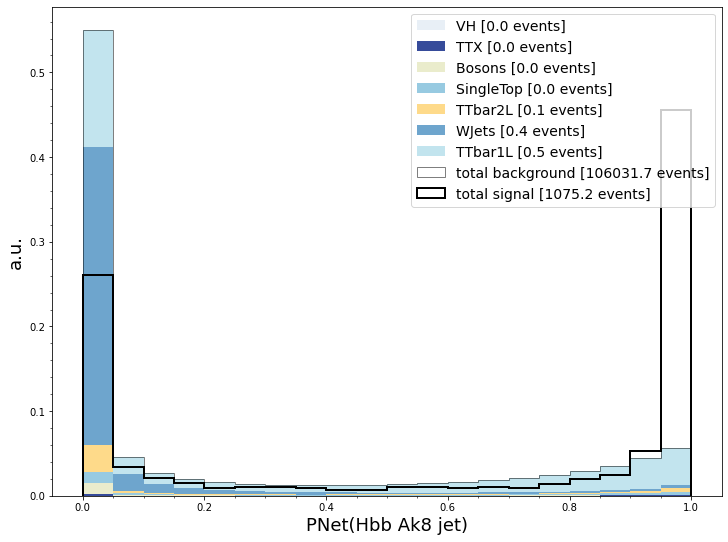

In [24]:
vbswh.plot_sig_vs_bkg(
    "hbbjet_score", np.linspace(0, 1.0, 21), 
#     selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300", 
    x_label="PNet(Hbb Ak8 jet)",
    stacked=True,
    norm=True
);

In [25]:
vbswh.fom_scan(
    "hbbjet_score", np.linspace(0.91, 0.99, 9), operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300,161.58912736958405,131.24347912724,14.105005776591591
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.91,87.61948714736445,12.660950590401761,24.62450731165261
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.92,85.99779800197604,11.736958021658186,25.10207110890626
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.93,84.0197225144195,10.724820053591106,25.65583984304321
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.9400000000000001,82.63122149548646,9.544253283777799,26.746884033456155
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.95,80.4961187821938,8.085640153677732,28.30855725535783
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.96,78.12382679139216,6.57055931779047,30.47771041549907
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.97,74.52745027490883,4.8706250384179475,33.7694443

(sig, bkg)
(108.22659126605885, 53.071554143742105)
(722, 5368)
(52.94266777774917, 112.327491780715)
(370, 5818)


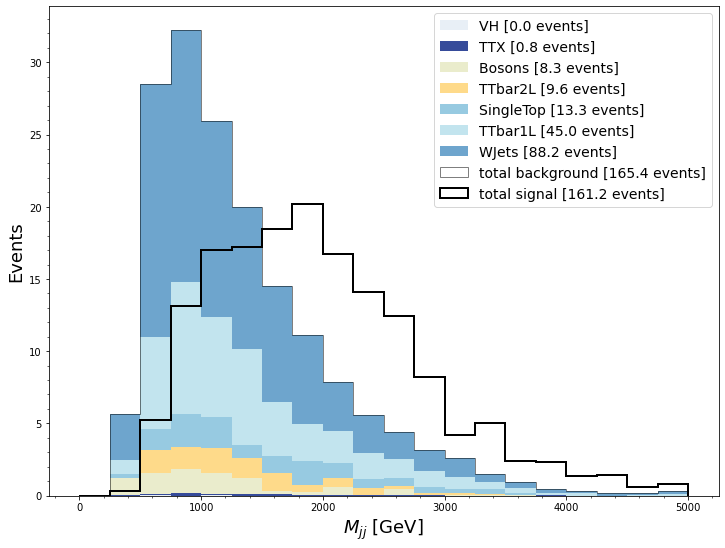

In [26]:
vbswh.plot_sig_vs_bkg(
    "M_jj", np.linspace(0, 5000, 21), 
    selection="abs(deta_jj) > 5 and ST > 1500",
    x_label="$M_{jj}$ [GeV]", 
    logy=True,
    stacked=True
);
print("(sig, bkg)")
print(vbswh.get_event_counts(selection="abs(deta_jj) > 5 and ST > 1500 and M_jj >= 1500"))
print(vbswh.get_event_counts(selection="abs(deta_jj) > 5 and ST > 1500 and M_jj >= 1500", raw=True))
print(vbswh.get_event_counts(selection="abs(deta_jj) > 5 and ST > 1500 and M_jj < 1500"))
print(vbswh.get_event_counts(selection="abs(deta_jj) > 5 and ST > 1500 and M_jj < 1500", raw=True))

In [27]:
def lepton_charge_plot(vbswh, selection=None):
    fig, axes = plt.subplots(figsize=(12, 9))

    bkg_df = vbswh.bkg_df(selection=selection)
    sig_df = vbswh.sig_df(selection=selection)

    bkg_counts, _, _ = axes.hist(
        (bkg_df.lep_pdgID > 0).astype(int),
        bins=[0, 1, 2],
        alpha=0.5,
        weights=np.ones(len(bkg_df))/len(bkg_df),
        label=f"total background [{bkg_df.event_weight.sum():0.1f}]"
    );
    axes.text(0.5, bkg_counts[0]+0.01, f"{bkg_counts[0]:0.2f}", size=16, ha="center")
    axes.text(1.5, bkg_counts[1]+0.01, f"{bkg_counts[1]:0.2f}", size=16, ha="center")

    sig_counts, _, _ = axes.hist(
        (sig_df.lep_pdgID > 0).astype(int),
        bins=[0, 1, 2],
        histtype="step",
        color="r",
        weights=np.ones(len(sig_df))/len(sig_df),
        label=f"total signal [{sig_df.event_weight.sum():0.1f}]"
    );
    axes.text(0.5, sig_counts[0]+0.01, f"{sig_counts[0]:0.2f}", size=16, ha="center")
    axes.text(1.5, sig_counts[1]+0.01, f"{sig_counts[1]:0.2f}", size=16, ha="center")

    axes.set_ylabel("Events/Total", size=18)
    axes.set_xticks([0.5, 1.5]);
    axes.set_xticklabels(["$\ell^{+}$", "$\ell^{-}$"], size=18);

    axes.legend(fontsize=16);

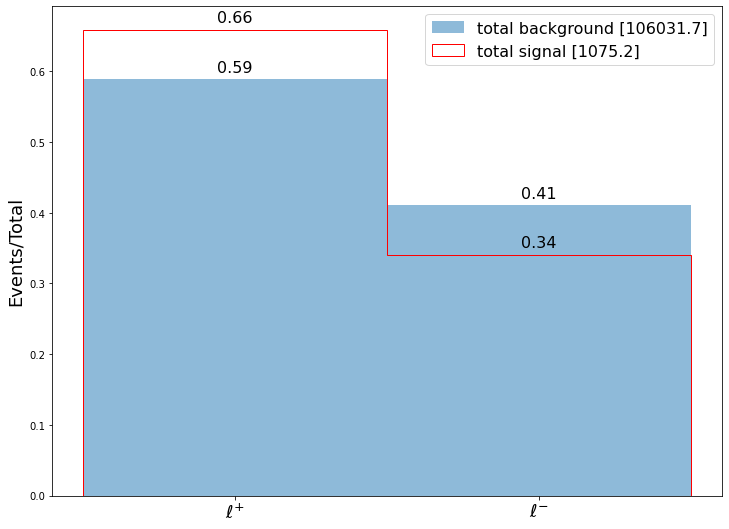

In [28]:
lepton_charge_plot(vbswh)

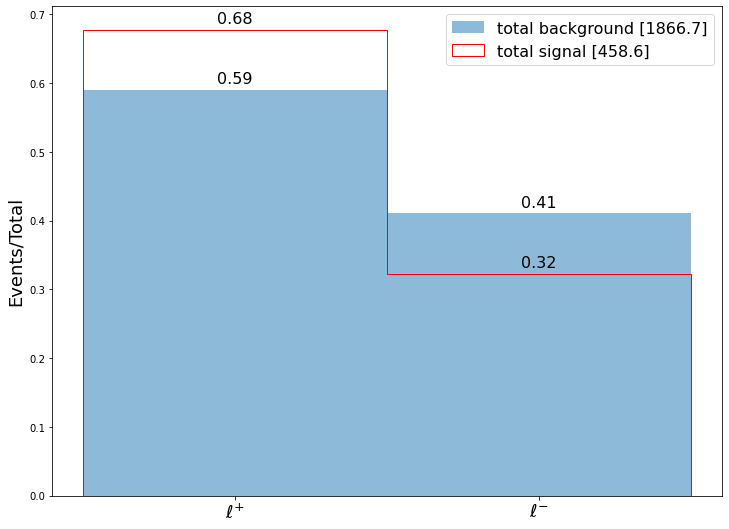

In [29]:
lepton_charge_plot(vbswh, selection="M_jj > 1500 and abs(deta_jj) > 5")

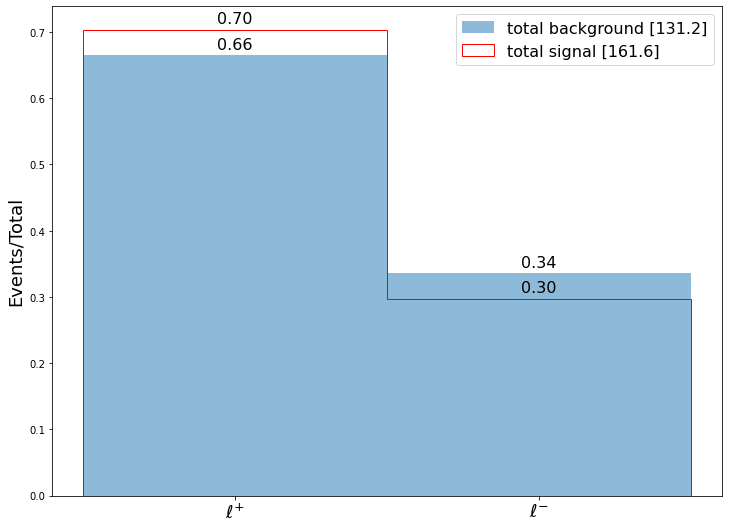

In [30]:
lepton_charge_plot(vbswh, selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300")